In [1]:
# -*- coding:utf-8 -*-
import poloniex
import time
import json


# poloniex API
polo = poloniex.Poloniex()
# 2017/12/12 AM 12:00 @JP
unix_time = 1514646000

#4h間隔で過去180日分 UNIX時間で取得 
chart_data_btc = polo.returnChartData('USDT_BTC', period=14400, start=unix_time-polo.DAY*180, end=unix_time)
chart_data_eth = polo.returnChartData('USDT_ETH', period=14400, start=unix_time-polo.DAY*180, end=unix_time)


In [2]:
# 
import requests
import json
from datetime import datetime

# 2017/12/31 AM 12:00 @JP
unix_time = datetime.strptime("2018-2-18 15:00:00",'%Y-%m-%d %H:%M:%S').strftime('%s')
print(unix_time)

q = {'periods':86400,'before':unix_time}
price = json.loads(requests.get('https://api.cryptowat.ch/markets/bitflyer/btcjpy/ohlc',params=q).text)['result']
# crypto watch
import pandas as pd 
chart_data_btc = pd.DataFrame({'date':[p[0] for p in price['86400'][-180:]],
                          'close':[p[-3] for p in price['86400'][-180:]]
                         })


1518933600


In [3]:
# 線形代数の演算でよく使うnumpyの読み込み
import numpy as np

# API経由では文字列（String型）として受け取るため、float型に変換しておく
# また、Chainerではfloat32を推奨しているため、こちらに合わせておく
data = chart_data_btc['close'].astype(np.float32)

# データを入力変数xと出力変数tに切り分け
x, t = [], []
N = len(data)
M = 30 # 入力変数の数：直近30サンプルを使用
for n in range(M, N):
    # 入力変数と出力変数の切り分け
    _x = data[n-M: n] # 入力変数
    _t = data[n] # 出力変数
    # 計算用のリスト(x, t)に追加していく
    x.append(_x)
    t.append(_t)
    
# numpyの形式に変換する（何かと便利なため）
x = np.array(x)
t = np.array(t).reshape(len(t), 1)  # reshapeは後々のChainerでエラーが出ない対策
# 70%を訓練用、30%を検証用
N_train = int(N * 0.7)
x_train, x_test = x[:N_train], x[N_train:]
t_train, t_test = t[:N_train], t[N_train:]

# scikit-learnのlinear_modelを読み込み
from sklearn import linear_model

# 重回帰分析モデルの宣言
reg = linear_model.LinearRegression()

# 訓練データを使ったモデルの学習
reg.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
# 訓練データ
reg.score(x_train, t_train)

0.9760633768689291

In [75]:
# 検証データ
reg.score(x_train, t_train)

0.9760633768689291

/Users/kyohei/.pyenv/versions/3.5.3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


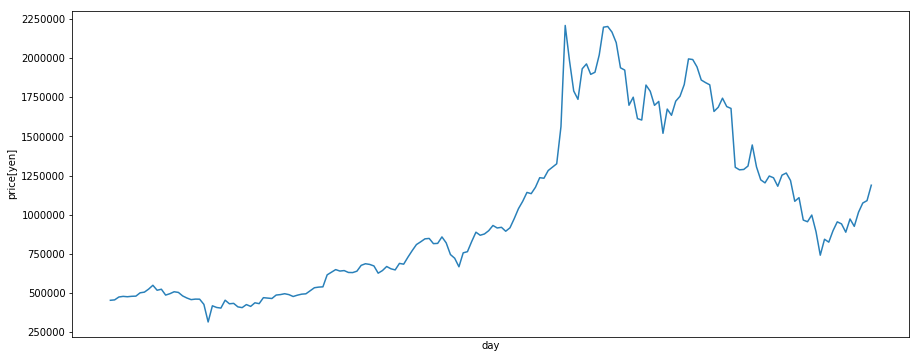

In [8]:
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 6
import matplotlib.pyplot as plt
# 短期線と長期線もプロット
plt.tick_params(labelbottom="off",bottom="off") # x軸の削除
plt.plot(chart_data_btc['close'], color='#2980b9')
plt.xlabel('day')
plt.ylabel('price[yen]')
plt.show()

/Users/kyohei/.pyenv/versions/3.5.3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


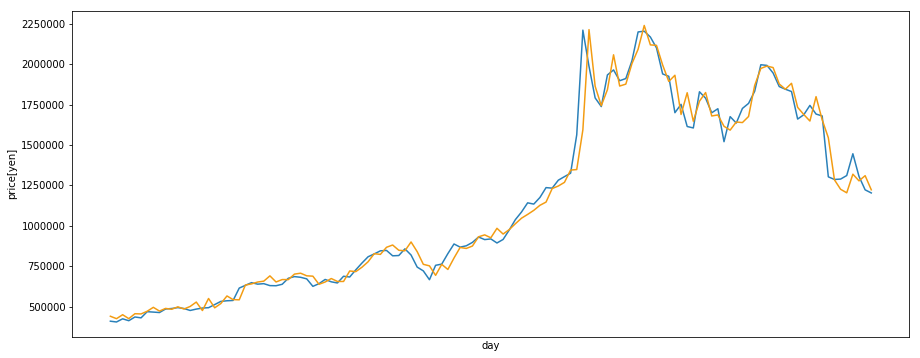

In [10]:
# 訓練データ
plt.plot(t_train, color='#2980b9')  # 実測値は青色
plt.tick_params(labelbottom="off",bottom="off") # x軸の削除
plt.plot(reg.predict(x_train), color='#f39c12')  # 予測値はオレンジ
plt.xlabel('day')
plt.ylabel('price[yen]')
plt.show()

/Users/kyohei/.pyenv/versions/3.5.3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


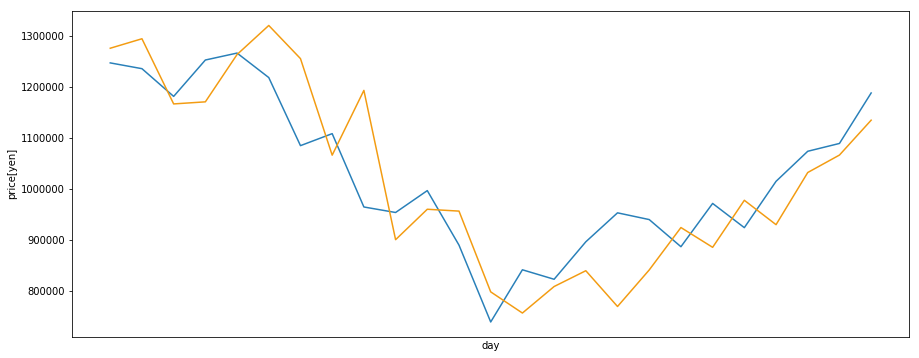

In [9]:
# 検証データ
plt.plot(t_test, color='#2980b9')  # 実測値は青色
plt.tick_params(labelbottom="off",bottom="off") # x軸の削除
plt.plot(reg.predict(x_test), color='#f39c12')  # 
plt.xlabel('day')
plt.ylabel('price[yen]')
plt.show()

In [2]:
import pandas as pd

# DataFrameに変換
df_btc = pd.DataFrame(chart_data_btc)
df_btc.tail(10)

,close,date,high,low,open,quoteVolume,volume,weightedAverage
1070,14826.99999993,1514505600,14949,14007.62220544,14307.3458536,905.12758805,13157164.279351,14536.25373158
1071,14546.27985515,1514520000,15100,14425,14802.00000021,803.04225976,11869415.938945,14780.56203728
1072,14280.99999996,1514534400,14698.34440429,13770.00000005,14517.999999,1348.58732123,19155752.878701,14204.31037511
1073,14484.21101931,1514548800,14526.80029789,13852.87411951,14280.99999991,1486.47948382,21114091.286464,14204.09196109
1074,14649.99999989,1514563200,14800.00000003,14260.0000002,14441.98275242,1110.23894657,16134655.007307,14532.59684066
1075,14305.53422499,1514577600,14656,13976.237,14611.99035903,1313.25443857,18782650.869227,14302.36998831
1076,13346.55602013,1514592000,14365.38790685,12950,14305.53422499,3348.03444495,45316478.670153,13535.24864073
1077,13430.18895654,1514606400,13548.95520108,12800,13343.41005586,1534.326203,20306275.245515,13234.65323463
1078,13154.86175661,1514620800,13548.50160852,12800,13430.18895654,1634.46269265,21517512.342814,13164.88436204
1079,12280.00000011,1514635200,13183.34433578,11855,13154.86175664,2892.64766233,35635447.095756,12319.31823561


In [3]:
df_eth = pd.DataFrame(chart_data_eth)
df_eth.tail(10)

,close,date,high,low,open,quoteVolume,volume,weightedAverage
1070,737.11699917,1514505600,738,704.88000172,710,2965.93650419,2147485.3756792,724.04967963
1071,728.20614002,1514520000,748,722.42452529,737.11699917,2981.35168385,2195050.2421961,736.26008433
1072,722,1514534400,740.0809157,701,730.49,4398.72135398,3164912.9517763,719.50748799
1073,744.279301,1514548800,744.279301,710,725.98435996,4417.0275604,3216808.2054937,728.27442471
1074,746.02000009,1514563200,754.11111111,728.76579694,742.99999998,5771.82837759,4269082.9539158,739.64135359
1075,731.73892108,1514577600,750.29837957,715,746.05,4369.5441841,3193668.6552774,730.89286221
1076,681.91725872,1514592000,736.98905466,668.8389372,731.73892101,12560.45278872,8726675.8190696,694.77398353
1077,697.09992989,1514606400,699.77046695,658.99999828,679,8674.04674092,5887322.3666217,678.72845771
1078,698.99999998,1514620800,700,680.22722357,697.09992982,6226.67586781,4315079.9753411,692.99897199
1079,662.9999997,1514635200,699,641.18991755,698.99999997,10787.63123767,7171234.0144884,664.76447484


In [6]:
# 短期線：窓幅1日
data_s_btc = df_btc['close'].rolling(window=6).mean() 
#data_s_eth = df_eth['close'].rolling(window=6).mean() 
# 長期線：窓幅5日
data_l_btc = df_btc['close'].rolling(window=6*5).mean()
#data_l_eth = df_eth['close'].rolling(window=6*5).mean()

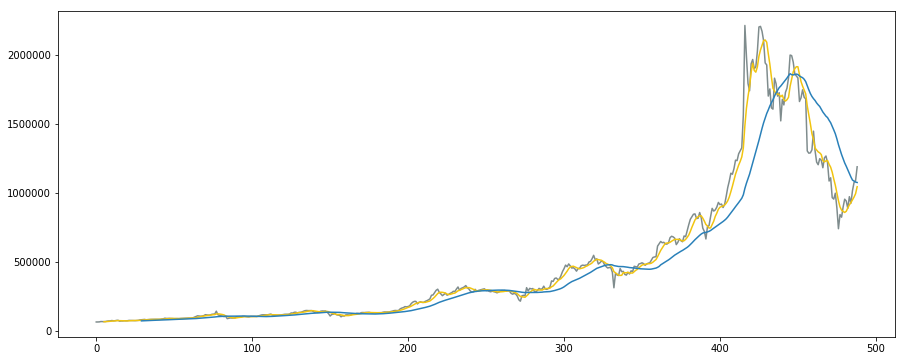

In [7]:
import matplotlib.pyplot as plt
# 描画を綺麗に表示する
from matplotlib.pylab import rcParams
import seaborn as sns


rcParams['figure.figsize'] = 15, 6

# 短期線と長期線もプロット
plt.plot(df_btc['close'], color='#7f8c8d')
plt.plot(data_s_btc, color='#f1c40f')  # 短期線
plt.plot(data_l_btc, color='#2980b9')  # 長期線
plt.
plt.show()

In [8]:
# 短期線と長期線もプロット
plt.plot(df_eth['close'], color='#7f8c8d')
plt.plot(data_s_eth, color='#f1c40f')  # 短期線
plt.plot(data_l_eth, color='#2980b9')  # 長期線
plt.show()

NameError: name 'df_eth' is not defined

- もとの価格だと学習が進まなかったため、最小、最大値で正規化
* TODO  fit_transformがよく分かってない

In [40]:
import numpy as np
np.random.seed(1)

# 正規化

data_btc = pd.DataFrame([float(i) for i in chart_data_btc['close']])
#data_eth = pd.DataFrame([float(i.get('close')) for i in chart_data_eth])

In [41]:
data_btc

,0
0,65807.0
1,65799.0
2,66418.0
3,69044.0
4,68417.0
5,68909.0
6,69039.0
7,71783.0
8,73129.0
9,73379.0


- 対数化
    - 人間の感覚に合わせる


In [42]:
from sklearn.preprocessing import MinMaxScaler
mss = MinMaxScaler()
data_btc = pd.DataFrame(mss.fit_transform(data_btc))
data_btc = data_btc[0].astype(np.float32)
#data_eth = pd.DataFrame(mss.fit_transform(data_eth))
#data_eth = data_eth[0].astype(np.float32)

In [44]:
# データを入力変数xと出力変数tに切り分け
x_btc, t_btc = [], []
x_eth, t_eth = [], []
N = len(data_btc)
M = 30 # 入力変数の数：直近30サンプルを使用
for n in range(M, N):
 # 入力変数と出力変数の切り分け
 _x = data_btc[n-M: n] # 入力変数
 _t = data_btc[n] # 出力変数
 # 計算用のリスト(x, t)に追加していく
 x_btc.append(_x)
 t_btc.append(_t)
    
# _x = data_eth[n-M: n] # 入力変数
# _t = data_eth[n] # 出力変数
 # 計算用のリスト(x, t)に追加していく
# x_eth.append(_x)
# t_eth.append(_t)

In [48]:
# scikit-learnのlinear_modelを読み込み
from sklearn import linear_model

# 重回帰分析モデルの宣言
reg = linear_model.LinearRegression()

# 訓練データを使ったモデルの学習
reg.fit(x_train, t_train)

30

In [49]:
# numpyに変換
# x.shape : 1050,30 t.shape : 1050,1
x_btc = np.array(x_btc)
x_btc = x_btc.reshape(x_btc.shape[0], x_btc.shape[1], 1)
t_btc = np.array(t_btc).reshape(len(t_btc), 1) 
#x_eth = np.array(x_eth)
#x_eth = x_eth.reshape(x_eth.shape[0], x_eth.shape[1], 1)
#t_eth = np.array(t_eth).reshape(len(t_eth), 1) 

# test, train分ける
N_train = int(len(x_btc) * 0.9)
#x_train, x_test = np.append(x_btc[:N_train],x_eth[:N_train] , axis=0), x_btc[N_train:]
#t_train, t_test = np.append(t_btc[:N_train],t_eth[:N_train], axis=0), t_btc[N_train:]
x_train, x_test = x_btc[:N_train], x_btc[N_train:]
t_train, t_test = t_btc[:N_train], t_btc[N_train:]


array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

- TODO keras LSTMの2つのdropoutの意味

In [33]:
# model
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

length_of_sequence = x_btc.shape[1] # 30 = M

in_out_neurons = 1
# n_hidden: 出力次元
n_hidden = 300
model = Sequential()
# return_sequenceとは、TrueにしてRNNレイヤーの毎時刻の出力を得るか、Falseにして最後の時刻のみの出力を得るか、のフラグ
# batch_iuput_shape: ([バッチサイズ，step数，特徴の次元数])
model.add(LSTM(units=n_hidden,
               batch_input_shape=(None, length_of_sequence, in_out_neurons), 
               return_sequences=False
              ))
model.add(Dropout(0.5))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


## 学習

In [50]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(x_train, t_train,
          batch_size=20,
          epochs=30,
          #validation_split=0.1,
          shuffle=True,
          callbacks=[early_stopping]
          )

Epoch 1/30
413/413 [==============================] - 2s - loss: 0.0170     
Epoch 2/30
 20/413 [>.............................] - ETA: 2s - loss: 0.0026

/Users/kyohei/.pyenv/versions/3.5.3/lib/python3.5/site-packages/keras/callbacks.py:496: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


413/413 [==============================] - 2s - loss: 0.0024     
Epoch 3/30
413/413 [==============================] - 2s - loss: 0.0016     
Epoch 4/30
413/413 [==============================] - 2s - loss: 0.0024     
Epoch 5/30
413/413 [==============================] - 2s - loss: 0.0021     
Epoch 6/30
413/413 [==============================] - 2s - loss: 0.0018     
Epoch 7/30
413/413 [==============================] - 2s - loss: 0.0018     
Epoch 8/30
413/413 [==============================] - 2s - loss: 0.0016     
Epoch 9/30
413/413 [==============================] - 2s - loss: 0.0021     
Epoch 10/30
413/413 [==============================] - 2s - loss: 0.0015     
Epoch 11/30
413/413 [==============================] - 2s - loss: 0.0019     
Epoch 12/30
413/413 [==============================] - 2s - loss: 0.0017     
Epoch 13/30
413/413 [==============================] - 2s - loss: 0.0018     
Epoch 14/30
413/413 [==============================] - 2s - loss: 0.0020     
Epoch

## Test

In [51]:
score = model.evaluate(x_test, t_test, batch_size=20, verbose = 1)
print("score:", score)

46/46 [==============================] - 0s     
score: 0.0032714786483784733


## Predict

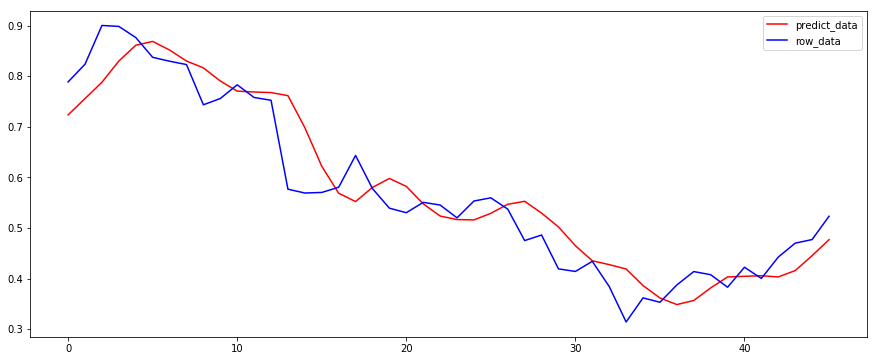

In [52]:
predicted = model.predict(x_test)
plt.figure()
plt.plot(range(0, len(predicted)), predicted, color="r", label="predict_data")
plt.plot(range(0, len(t_test)), t_test, color="b", label="row_data")
plt.legend()
plt.show()